<a href="https://colab.research.google.com/github/lightandsalt/TEST/blob/master/Probabilistic_Models_Final_Project_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Probablistic Models: The Final Project Problem Sheet</font></h1>

## Introduction

In this Project, all your methods you have learnt from the course would be selectively used for suggesting your best predictive models, and focussing on the **Modeling** and **Evaluation** stages.

------------

The data below was compiled by a researcher named Yong-Yeol Ahn, who scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig1_allrecipes.png" width=500>

www.allrecipes.com

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig2_epicurious.png" width=500>

www.epicurious.com

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab4_fig3_menupan.png" width=500>

www.menupan.com

For more information on Yong-Yeol Ahn and his research, you can read his paper on [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf).

The compiled data will be accessed through the BB site (the file name is recipes.csv)

Your first task should read the data into data frame!

In [ ]:
# Your code should be here 
import pandas as pd
from pandas import DataFrame, Series
recipes = pd.read_csv('/content/sample_data/recipes.csv')

I have preprocessed the data as follows: 

In [ ]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

<hr>

# Data Modeling <a id="2"></a>


You can model the data above in many different format. I am giving one example you can do to make a decision tree 

In [ ]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

!pip install graphviz
import graphviz

from sklearn.tree import export_graphviz

import itertools

Here, I am creating a decision tree for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason for this is because the decision tree does not run well when the data is biased towards one cuisine, in this case American cuisines. One option is to exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. 

The following is my decision tree using the data pertaining to the Asian and Indian cuisines and name our decision tree *asian_tree*.

In [ ]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

asian_tree = tree.DecisionTreeClassifier(max_depth=3)
asian_tree.fit(ingredients, cuisines)

print("Decision tree model saved to asian_tree!")

Decision tree model saved to asian_tree!


Your job is to plot the decision tree and examine how it looks like.

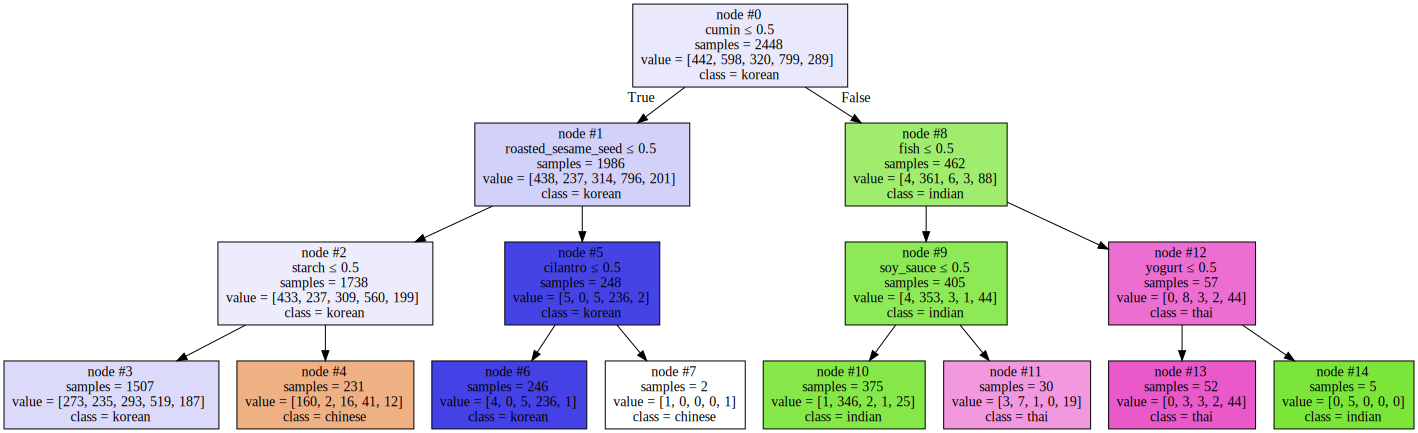

In [ ]:
export_graphviz(asian_tree,
                feature_names=list(ingredients.columns.values),
                out_file="asian_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("asian_tree.dot") as asian_tree_image:
    asian_tree_graph = asian_tree_image.read()
graphviz.Source(asian_tree_graph)

The decision tree learned:
* If a recipe contains *cumin* and *fish* and **no** *yoghurt*, then it is most likely a **Thai** recipe.
* If a recipe contains *cumin* but **no** *fish* and **no** *soy_sauce*, then it is most likely an **Indian** recipe.

Your next job is to analyze the remaining branches of the tree to come up with similar rules for determining the cuisine of different recipes. 

Decision tree model saved to europian_tree!


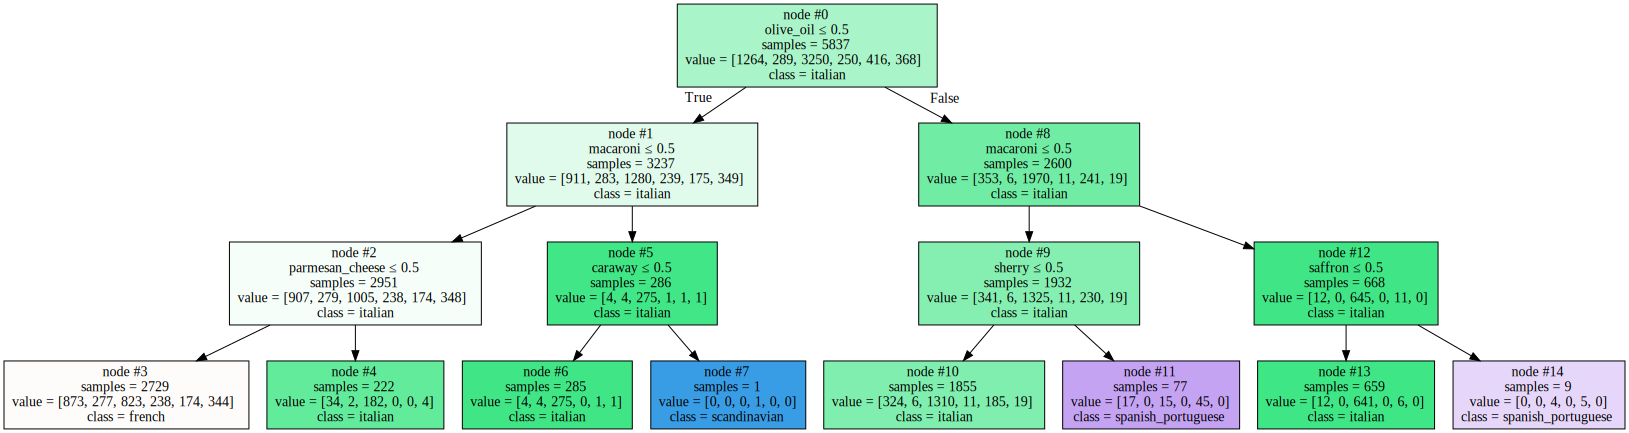

In [ ]:
#Your Code here 
europian_recipes = recipes[recipes.cuisine.isin(["austrian","belgian","dutch","french","german","italian","scandinavian","spanish_portuguese","swiss","uk-and-irish"])]
cuisines = europian_recipes["cuisine"]
ingredients = europian_recipes.iloc[:,1:]

europian_tree = tree.DecisionTreeClassifier(max_depth=3)
europian_tree.fit(ingredients, cuisines)

print("Decision tree model saved to europian_tree!")
export_graphviz(europian_tree,
                feature_names=list(ingredients.columns.values),
                out_file="europian_tree.dot",
                class_names=np.unique(cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("europian_tree.dot") as europian_tree_image:
    europian_tree_graph = europian_tree_image.read()
graphviz.Source(europian_tree_graph)

Your accounts of the outcomes should be described in here
* If a recipe contains *olive_oil* and *macaroni* and *saffron*, then it is most likely a **spanish_portuguese** recipe.
* If a recipe contains *olive_oil* but **no** *macaroni* and **no** *sherry*, then it is most likely an **Italian** recipe.

Feel free to select another subset of cuisines and build a decision tree of their recipes. You can select some European cuisines and build a decision tree to explore the ingredients that differentiate them.

In [ ]:
#Your code here

Your accounts of the outcomes should be described in here


# Model Evaluation <a id="4"></a>

To evaluate our model of Asian and Indian cuisines, I split the dataset into a training set and a test set. I will build the decision tree using the training set. Then, wIe will test the model on the test set and compare the cuisines that the model predicts to the actual cuisines. 

Let's first create a new dataframe using only the data pertaining to the Asian and the Indian cuisines, and let's call the new dataframe **bamboo**.

In [ ]:
asian = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

Let's see how many recipes exist for each cuisine.

In [ ]:
asian["cuisine"].value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

Let's remove 30 recipes from each cuisine to use as the test set, and let's name this test set **bamboo_test**.

In [ ]:
# set sample size
sample_n = 30

Create a dataframe containing 30 recipes from each cuisine, selected randomly.

In [ ]:
# take 30 recipes from each cuisine
random.seed(1234) # set random seed
asian_test = asian.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

asian_test_ingredients = asian_test.iloc[:,1:] # ingredients
asian_test_cuisines = asian_test["cuisine"] # corresponding cuisines or labels

Check that there are 30 recipes for each cuisine.

In [ ]:
# check that we have 30 recipes from each cuisine
asian_test["cuisine"].value_counts()

korean      30
thai        30
indian      30
japanese    30
chinese     30
Name: cuisine, dtype: int64

Next, let's create the training set by removing the test set from the **bamboo** dataset, and let's call the training set **bamboo_train**.

In [ ]:
asian_test_index = asian.index.isin(asian_test.index)
asian_train = asian[~asian_test_index]

asian_train_ingredients = asian_train.iloc[:,1:] # ingredients
asian_train_cuisines = asian_train["cuisine"] # corresponding cuisines or labels

Check that there are 30 _fewer_ recipes now for each cuisine.

In [ ]:
asian_train["cuisine"].value_counts()

korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: cuisine, dtype: int64

Let's build the decision tree using the training set, **bamboo_train**, and name the generated tree **bamboo_train_tree** for prediction.

In [ ]:
asian_train_tree = tree.DecisionTreeClassifier(max_depth=15)
asian_train_tree.fit(asian_train_ingredients, asian_train_cuisines)

print("Decision tree model saved to asian_train_tree!")

Decision tree model saved to asian_train_tree!


Let's plot the decision tree and explore it.

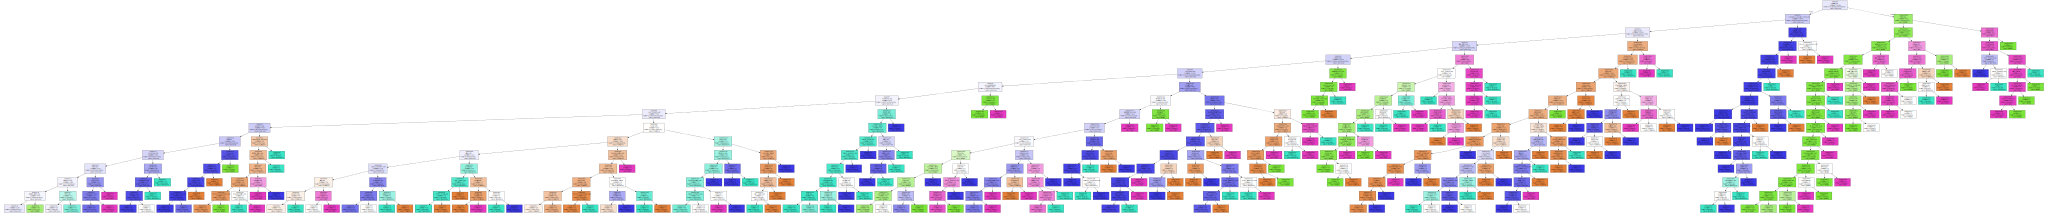

In [ ]:
export_graphviz(asian_train_tree,
                feature_names=list(asian_train_ingredients.columns.values),
                out_file="asian_train_tree.dot",
                class_names=np.unique(asian_train_cuisines),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("asian_train_tree.dot") as asian_train_tree_image:
    asian_train_tree_graph = asian_train_tree_image.read()
graphviz.Source(asian_train_tree_graph)

Now that we defined our tree to be deeper, more decision nodes are generated.

Now let's test our model on the test data.

In [ ]:
#your code should be here
from sklearn.metrics import confusion_matrix
confusion_matrix(asian_test_cuisines, asian_train_tree.predict(asian_test_ingredients))

array([[18,  0,  3,  8,  1],
       [ 0, 26,  0,  3,  1],
       [ 8,  0, 15,  7,  0],
       [ 1,  0,  6, 23,  0],
       [ 4,  2,  3,  6, 15]])

To quantify how well the decision tree is able to determine the cuisine of each recipe correctly, you will create a confusion matrix which presents a nice summary on how many recipes from each cuisine are correctly classified. It also sheds some light on what cuisines are being confused with what other cuisines.

So let's go ahead and create the confusion matrix for how well the decision tree is able to correctly classify the recipes in **bamboo_test**.

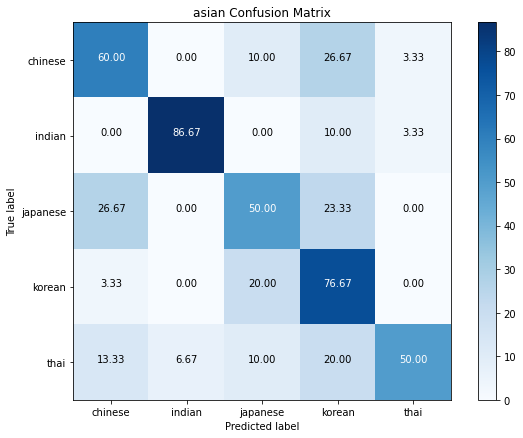

In [ ]:
test_cuisines = np.unique(asian_test_cuisines)
asian_pred_cuisines = asian_train_tree.predict(asian_test_ingredients)
asian_confusion_matrix = confusion_matrix(asian_test_cuisines, asian_pred_cuisines, test_cuisines)
title = 'asian Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
asian_confusion_matrix = (
    asian_confusion_matrix.astype('float') / asian_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(asian_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = asian_confusion_matrix.max() / 2.
for i, j in itertools.product(range(asian_confusion_matrix.shape[0]), range(asian_confusion_matrix.shape[1])):
    plt.text(j, i, format(asian_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if asian_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

# 새 섹션

<br>
<hr>

### Like what I have with Decision Tree...

Your job is to select one of the classification statistical learning methods (Logit Regression, LDA, KNN, Ridge, Laso, PCA, SVM, K-Means), doing appropriately the same as I did above. 

- The technicality of your work would be checked by your thoroughness and various hypotheses. 

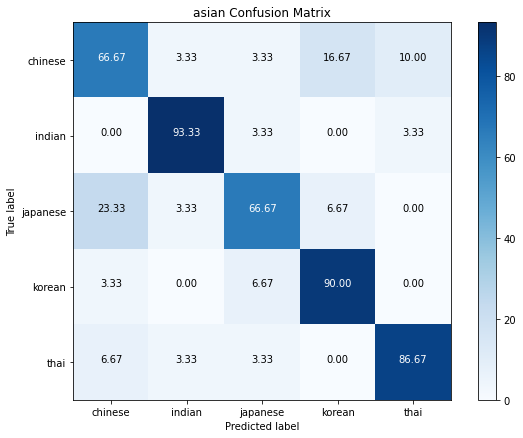

In [ ]:
#Your Codes and explanations of the outcomes should follow. 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X = asian_train_ingredients
y = asian_train_cuisines

model1 = LogisticRegression().fit(X, y)
pred_1 = model1.predict(asian_test_ingredients)

asian_confusion_matrix = confusion_matrix(asian_test_cuisines, pred_1, test_cuisines)
title = 'asian Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
asian_confusion_matrix = (
    asian_confusion_matrix.astype('float') / asian_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(asian_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = asian_confusion_matrix.max() / 2.
for i, j in itertools.product(range(asian_confusion_matrix.shape[0]), range(asian_confusion_matrix.shape[1])):
    plt.text(j, i, format(asian_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if asian_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

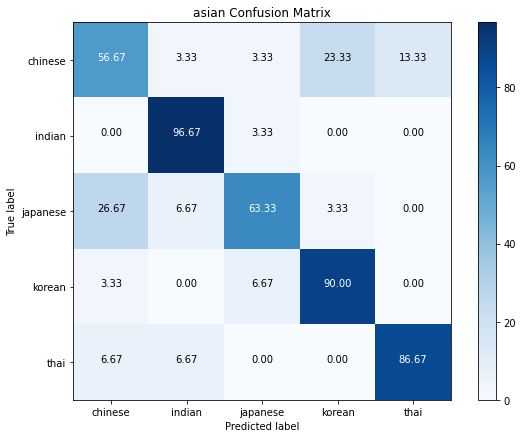

In [ ]:
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
pred_2 = model2.predict(asian_test_ingredients)

asian_confusion_matrix = confusion_matrix(asian_test_cuisines, pred_2, test_cuisines)
title = 'asian Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
asian_confusion_matrix = (
    asian_confusion_matrix.astype('float') / asian_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(asian_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = asian_confusion_matrix.max() / 2.
for i, j in itertools.product(range(asian_confusion_matrix.shape[0]), range(asian_confusion_matrix.shape[1])):
    plt.text(j, i, format(asian_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if asian_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()